 BUILDING AND TRAINING A MODEL TO DECTECT AN ONLINE PAYMENT FRAUD FROM A PREVIOUS DATA OBTAINED BY BLOSSOM BANK PLC


PROBLEM IDENTIFICATION:


This project is aimed at building a machine learning model to help in curbing the problem of fraudulent online payment by an institution known as blossom bank plc.



HOW WILL THE BUSSINESS BENEFIT FROM MY SOLUTION?

Due to the high rate of cybercrime in our society today, many institutions including governmental establishment and private organization have resolved to seeking ways to deal with this challenge, one of those ways is the use of ML models. at the end of this project blossom bank will have a more suitable way to detect an online fraud transaction which will help to safeguard people's money, reduce fraud and also gain the public trust. hence make more profit.

In [1]:
#importation of libraries for data manipulation and vissualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading of data

BB_data = pd.read_csv(r'C:\Users\Sirmiky\Downloads\Online Payment Fraud Detection (1).csv')

BB_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


# DATA INSPECTION

In [3]:
#shape of the dataframe

BB_data.shape

(1048575, 10)

In [4]:
#getting the descriptive statistics

BB_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [5]:
#cheecking the data types

BB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
#checking for missing values in the data

BB_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
#checking for unique items in 'type' colunmn

col_type = BB_data['type'].value_counts().to_frame()
col_type

,type
CASH_OUT,373641
PAYMENT,353873
CASH_IN,227130
TRANSFER,86753
DEBIT,7178


In [8]:
#distribution of target value

BB_data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

#the distribution above indicate that a total of number 1142 transaction was fraudlent while a total number of 1047433 was free of fraud

In [9]:
# Change the values in the 'isFraud' columns to "Fraud" & "No Fraud"

BB_data['isFraud'] = BB_data['isFraud'].map(lambda x: 'Fraud' if x==1 else 'NoFraud')

BB_data['isFraud']

0          NoFraud
1          NoFraud
2            Fraud
3            Fraud
4          NoFraud
            ...   
1048570    NoFraud
1048571    NoFraud
1048572    NoFraud
1048573    NoFraud
1048574    NoFraud
Name: isFraud, Length: 1048575, dtype: object

# VISSUALIZATION OF COLUMNS

TypeError: 'module' object is not callable

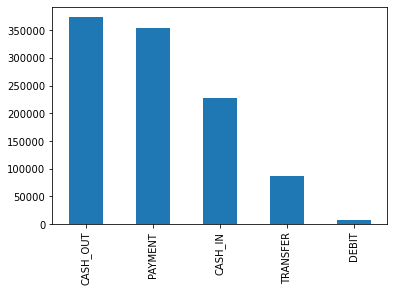

In [10]:
BB_data.type.value_counts().plot.bar()
plt('type')
plt.title('method of transaction')
plt.show()


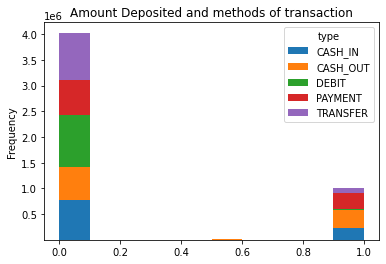

In [11]:
# a pivot showing the methods of transaction and amount 

amount_type_pivot = pd.crosstab(BB_data. amount, BB_data.type, normalize = 'index')

amount_type_pivot.plot.hist(stacked=True)

plt.title('Amount Deposited and methods of transaction')
plt.show()

In [12]:
# Total Number of Frauds Committed
pmt_fraud = BB_data.isFraud[BB_data['isFraud']=='Fraud'].count()
print (f'Total Number of Frauds Committed is {pmt_fraud}')

Total Number of Frauds Committed is 1142


In [13]:
# Ascertaining  the payment type that has/contains the most fraudlent activities
# Value of Frauds Committed
fraud_total = BB_data[BB_data['isFraud']=='Fraud'].groupby(['type'])['amount'].sum().round(decimals=-1).to_frame()
fraud_total['amount'] = fraud_total['amount']/1000
fraud_total.rename(columns={'amount':'amount_in_thousands'},inplace=True)

# Fraud Count
fraud_count =BB_data[BB_data['isFraud']=='Fraud'].groupby(['type'])['isFraud'].count().to_frame()
fraud_count.rename(columns={'isFraud':'fraud_count'}, inplace=True)


#Merge both tables above
frauds = pd.merge(fraud_count,fraud_total,on='type')
frauds['avg_fraud'] = (frauds['amount_in_thousands']/frauds['fraud_count']).round(decimals=2)


frauds

,fraud_count,amount_in_thousands,avg_fraud
type,,,
CASH_OUT,578,680383.86,1177.13
TRANSFER,564,681598.38,1208.51


#findings above confirm that cash_out and Transfers contains fraudlent transactions: of which Transfers has the highest

In [14]:
#Create a dataset for all fraud transactions

fraud_data = BB_data[BB_data['isFraud']=='Fraud']
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,Fraud
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,Fraud
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,Fraud
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,Fraud
...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,Fraud
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,Fraud
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,Fraud
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,Fraud


In [15]:
#check the transaction with the  Largest Fraud Amount

largest_fraud = fraud_data.amount.max()
print (f'The largest fraudulent payment is {largest_fraud}')
print()

# Displays row with the largest fraud amount
fraud_data.sort_values(by='amount',ascending=False).head(1)

The largest fraudulent payment is 10000000.0



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1030661,82,TRANSFER,10000000.0,C1237313447,11000000.0,987591.59,C1468356154,0.0,0.0,Fraud


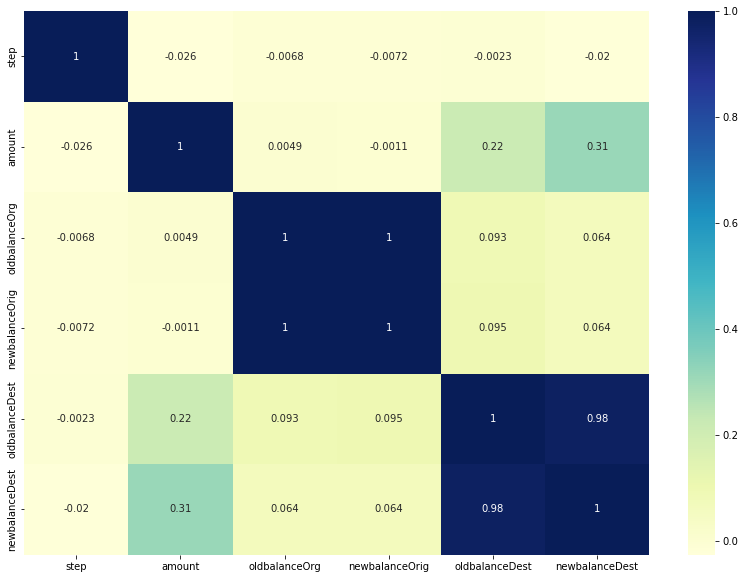

In [16]:
# (Correlation), plot a heatmap showing relationships between the variables in the fraud data

fig, ax = plt.subplots(figsize=(14,10))
fraud_data = sns.heatmap(BB_data.corr(), cmap="YlGnBu", annot=True)
plt.show()


# FEATURE ENGINEERING/ENCODING

In [17]:
#original data, i.e before encoding

BB_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,NoFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,NoFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,NoFraud
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,NoFraud
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,NoFraud
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,NoFraud
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,NoFraud
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,NoFraud


In [18]:
#use get dumies to drop the first column and also the type column as it may affect our model learning ability

BB_data_Dum = pd.get_dummies(BB_data, columns=['type'],drop_first = True)
BB_data_Dum

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,NoFraud,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,NoFraud,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,NoFraud,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,NoFraud,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,NoFraud,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,NoFraud,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,NoFraud,0,0,1,0


In [19]:
# Rwmove the step,nameOrig,nameDest columns as they may not be suefull to our model in terms of prdicting

BB_data_Dum.drop(columns=['step','nameOrig','nameDest'],inplace=True)
BB_data_Dum.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,NoFraud,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,NoFraud,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,Fraud,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,Fraud,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,NoFraud,0,0,1,0


#note the target which is isFraud contains a class of inbalance, i.e the fraud and nofraud

#MODEL SELECTION AND TRAINING

In [39]:
# the two supervised model used for this prediction are DecisionTreeClassifier and RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Load the imbalanced dataset
X = BB_data_Dum.drop('isFraud',axis='columns')
y = BB_data_Dum.isFraud


In [50]:
#spliting of data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [46]:
from imblearn.over_sampling import SMOTE #to be used to balance the dataset


In [47]:
# sampling the minority class using SMOTE
smote = SMOTE(random_state=42,sampling_strategy='not majority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:
#initialize your model

KN_model = KNeighborsClassifier()
DT_model = DecisionTreeClassifier()

In [51]:
#fit the model

KN_model= KN_model.fit(X_train,y_train)
DT_model= DT_model.fit(X_train,y_train)

In [52]:
#creat a prediction

KN_preds = KN_model.predict(X_test)
DT_preds = DT_model.predict(X_test)

In [53]:
print("accuracy", accuracy_score(DT_preds,y_test))
print(classification_report(DT_preds,y_test))
print(confusion_matrix(DT_preds,y_test))

accuracy 0.9994818372841916
              precision    recall  f1-score   support

       Fraud       0.75      0.77      0.76       332
     NoFraud       1.00      1.00      1.00    314241

    accuracy                           1.00    314573
   macro avg       0.87      0.89      0.88    314573
weighted avg       1.00      1.00      1.00    314573

[[   256     76]
 [    87 314154]]


In [54]:
print("accuracy", accuracy_score(KN_preds,y_test))
print(classification_report(KN_preds,y_test))
print(confusion_matrix(KN_preds,y_test))

accuracy 0.9993515018771477
              precision    recall  f1-score   support

       Fraud       0.55      0.80      0.65       235
     NoFraud       1.00      1.00      1.00    314338

    accuracy                           1.00    314573
   macro avg       0.77      0.90      0.82    314573
weighted avg       1.00      1.00      1.00    314573

[[   187     48]
 [   156 314182]]


# KNEIGHBORSCLASSIFIERS RESULTS

#The KNeighborsClassifier produces the following  results;

Accuracy score of 100%
precision score of 55%
Recall score of 80%

its cofusion matrix shows;
187 true positive
48  False positive
156 False negative
314182 True Negative

# DECISIONTREECLASSIFIER RESULTS

#The DecissionTreeClassifier has the following results

Accuracy score of  100%
Precision score of 77%
Recall score of   75%


its confusion matrix has this results

256 True positive
76 False positive
87 False Negative
314154 False positve

After the exploratory data analysis and the suuccessfull training and testing  of two ML angorithm, the KNeighborsClassifier 
produces the highest Recall of 80% and it also shows a higher number of False negative figure which is 156 as against DecissionTreeClassifier which has a Recall of 75% and a false negative figure of 87.

So therefore the KNeighborsClassifier model should be adopted by Blosom Bank.


the false negative which is also called type two Error, means that in the actuals it is a fraudlent transaction while our model  had  predicted a no fraud scenario, so therefore it is better for blossom bank to have a case of fake fraudlent transactions than to have transactions slip through as a non fraudulent transaction, while in the actuals they are fraudulent transactions.

be'cos in the long run when people loos their money through fraud from the institution, Bloosom Bank will not just loss customers, they will also loss its reputation and public trust. This is my humble submmission  
